# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


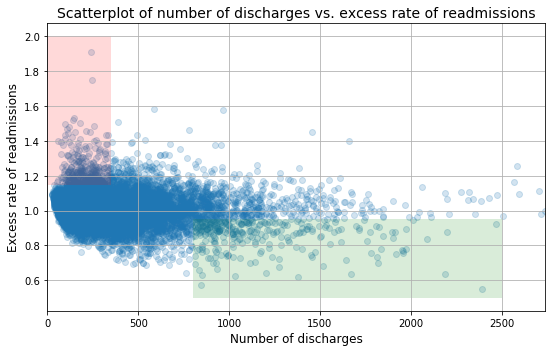

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Note: The significance level is assumed to be 0.01 for any and all hypothesis tests conducted in this analysis

#### Visualize cleaned data

In [7]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
#remove null values from Readmission Ratio
df = df[df['Excess Readmission Ratio'].notnull()]

### Assess the correlation between the number of discharges and excess readmission ratio for all hospitals

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


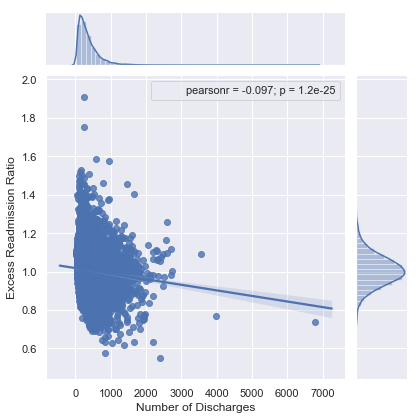

In [9]:
sns.set(style="darkgrid", color_codes=True)
g = sns.JointGrid('Number of Discharges', 'Excess Readmission Ratio', data = df)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)
plt.show()

The pearson correlation coefficient (-0.097) and related p-value (almost 0) show that there is, in fact, a negative correlation between the excess readmission ratio and the number of discharges. As the number of discharges increase (i.e. as the hospital capacity increases) , the ratio of excess readmissions decreases. The initial trend observed in the scatter plot in the preliminary analysis is therefore accurate.

However, it should be noted that while the dependency between the 2 variables is significant based on the p-value, the pearson correlation coefficient is extremely small (-0.097), indicating that the correlation is weak. 

### The preliminary report states that in hospitals/facilities with number of discharges < 100, the mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [10]:
#Sample of small hospitals
small_hospitals = df[df['Number of Discharges'] < 100]

#Calculate mean rate and percent of hospitals with rate greater than 1
mean_small = small_hospitals['Excess Readmission Ratio'].mean()
rate_greater_than1 = (small_hospitals['Excess Readmission Ratio']>1).sum()/len(small_hospitals)

#Print
print('Mean excess readmission rate:',format(mean_small,'.3f'))
print('Percentage of small hospitals with excess readmission rate greater than 1:','{:.2%}'.format(rate_greater_than1))

Mean excess readmission rate: 1.023
Percentage of small hospitals with excess readmission rate greater than 1: 63.22%


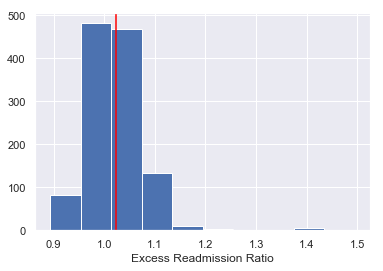

In [11]:
_ = plt.hist(small_hospitals['Excess Readmission Ratio'])
_ = plt.axvline(mean_small,color='red',label='mean')
_ = plt.xlabel('Excess Readmission Ratio')

Our analysis shows that the mean ratio of excess readmission is, in fact, 1.023 for small hospitals (i.e. hospitals with fewer than 100 discharges). Almost 60% of these small hospitals have an excess readmission rate greater than 1, indicating that about 40% of them are at a rate of 1 of below.

### Assess the correlation between the number of discharges and excess readmission ratio for small hospitals

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


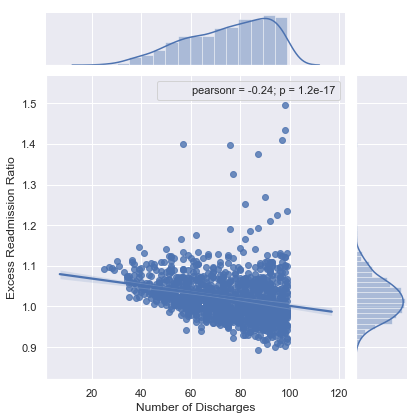

In [12]:
g = sns.JointGrid('Number of Discharges', 'Excess Readmission Ratio', data = small_hospitals)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)
plt.show()

Our p-value (almost 0) shows that for small hospitals, the negative correlation between excess readmission rate and number of discharges is statistically significant. In addition, the pearson correlation coefficient (-0.24) is more negative than for the overall sample, indicating that this correlation is stronger for smaller hospitals than for the general population. In other words, for hospitals with fewer than 100 discharges, higher number of discharges are more likely to lead to readmissions than for the overall sample.

### The preliminary report states that in hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [13]:
#Sample of large hospitals
large_hospitals = df[df['Number of Discharges'] > 1000]

#Calculate mean rate and percent of hospitals with rate greater than 1
mean_large = large_hospitals['Excess Readmission Ratio'].mean()
rate_greater_than1 = (large_hospitals['Excess Readmission Ratio']>1).sum()/len(large_hospitals)

#Print
print('Mean excess readmission rate:',format(mean_large,'.3f'))
print('Percentage of large hospitals with excess readmission rate greater than 1:','{:.2%}'.format(rate_greater_than1))

Mean excess readmission rate: 0.978
Percentage of large hospitals with excess readmission rate greater than 1: 44.49%


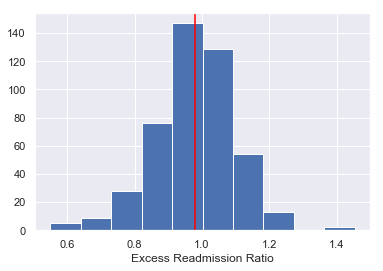

In [14]:
_ = plt.hist(large_hospitals['Excess Readmission Ratio'])
_ = plt.axvline(mean_large,color='red',label='mean')
_ = plt.xlabel('Excess Readmission Ratio')

Our analysis shows that the mean ratio of excess readmission is, in fact, 0.978 for large hospitals (i.e. hospitals with more than 1000 discharges). 44% of these large hospitals have an excess readmission rate greater than 1, indicating that about 46% of them are at a rate of 1 of below.

### Assess the correlation between the number of discharges and excess readmission ratio for large hospitals

/Users/loonydeepti/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


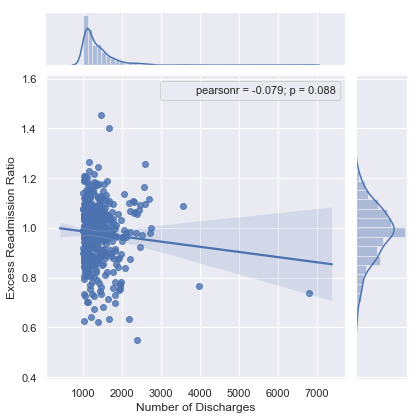

In [15]:
g = sns.JointGrid('Number of Discharges', 'Excess Readmission Ratio', data = large_hospitals)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)
plt.show()

Our p-value for the large hospitals is 0.088 (greater than our significance level of 0.05). This means that we fail to reject the null hypothesis of independency. Therefore, there is no statistically significant correlation between the number of discharges and excess readmission rates for hospitals with discharges greater than 1000. This indicates that the slight negative correlation seen in the general sample is likely due to the data from the small hospitals.

### Small hospitals have a mean excess readmission rate of 1.023 while large hospitals have a mean rate of 0.978. Could this difference in rate have happened by chance? In order to determine whether this difference is statistically significant, we can conduct a hypothesis test.

In [16]:
#Null hypothesis: Mean excess readmission rates are equal for small and large hospitals
#Alternate hypothesis: Means excess readmission rates are not equal for small and large hospitals

stat,p = stats.ttest_ind(small_hospitals['Excess Readmission Ratio'],large_hospitals['Excess Readmission Ratio'])
print('test-statistic:', stat)
print('p-value:', p)
if p < 0.01:
    print('Reject null hypothesis: Sample means are not equal')
else:
    print('Fail to reject null hypothesis: Sample means are equal')

test-statistic: 10.060620398500793
p-value: 3.778753923341558e-23
Reject null hypothesis: Sample means are not equal


Since the p-value is smaller than 0.01, we can conclude that the difference in mean excess readmission rates between small and large hospitals is statistically significant.

### For small hospitals, how does the excess readmission ratio differ by location?

In [17]:
#Average excess readmission ratio by state
state_ratios = small_hospitals.groupby(['State']).mean()[['Excess Readmission Ratio']].sort_values('Excess Readmission Ratio',
                                                                                                   ascending=False)

In [18]:
print('Number of states with an excess readmission ratio > 1:',(state_ratios['Excess Readmission Ratio'] > 1).sum())
print('Number of states with a excess readmission ratio <= 1:',(state_ratios['Excess Readmission Ratio'] <= 1).sum())

Number of states with an excess readmission ratio > 1: 38
Number of states with a excess readmission ratio <= 1: 10


In [19]:
#Average number of readmissions for hospitals
print('The average number of readmissions in small hospitals are:',format(small_hospitals['Number of Readmissions'].mean(),'.2f'))
print('The average number of readmissions in large hospitals are:',format(large_hospitals['Number of Readmissions'].mean(),'.2f'))

The average number of readmissions in small hospitals are: 15.93
The average number of readmissions in large hospitals are: 216.19


### Conclusion

The difference in mean excess readmission rates between small hospitals and large hospital is 0.045 and statistically significant. This means that for every 16 expected readmissions (which is the average number of readmissions for small hospitals), smaller hospitals see ~1(0.72) more readmission than large hospitals. Further analysis on the cost of these readmissions, the patient burden, and the cost to reduce the number of readmissions should be conducted but it is unlikely that this difference is practically meaningful for small hospitals to change their current system.

In addition, there is no concrete evidence that hospital capacity is the most significant factor in lowering excess readmission rates. While there is a correlation between hospital capacity (number of discharges) and readmission rates, it is only up to a certain point. For larger hospitals, increasing the number of discharges is unlikely to result in better readmission rates due to lack of significant correlation between the two features. 

For small hospitals, there is a statistically significant negative correlation between the number of discharges and readmission rates (i.e. increasing the number of discharges is related with lower readmission rates). This could be due to a number of reasons, such as:

+ lack of state-of-the-art facilities/resources
+ lack of capacity resulting in quicker discharges to make space for other patients
+ patient demographic resulting in wealth disparity and insurance issues

However, correlation does not imply causation. Until such possible reasons have been analyzed and the causative factor for this correlation has been identified, the accuracy of any regulatory policy recommendation cannot be verified. For example, small hospitals in 10/48 states see an excess average readmission ratio of <= 1, indicating that small hospitals in certain states can also achieve lower admission rates. In order to make an appropriate recommendation, further analyis of other factors should be considered to determine which factors have the greatest impact on the excess readmission ratio.